# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [8]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [10]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [17]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#  4. Get the average fare per ride for each city type. 
avg_fares_rides = total_fares / total_rides
avg_fares_rides

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [14]:
# 5. Get the average fare per driver for each city type. 
avg_fares_driver = total_fares / total_drivers
avg_fares_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [47]:
#  6. Create a PyBer summary DataFrame. 
#pyber_summary_df = pd.DataFrame(['total_rides', 'total_drivers', 'total_fares', 'avg_fares_city', 'avg_fares_driver'])
#pyber_summary_df
pyber_dict = {'Total Rides': total_rides, 'Total Drivers': total_drivers, 'Total Fares': total_fares, 'Average Fare per Ride': avg_fares_rides, 'Average Fare per Driver': avg_fares_driver}
pyber_summary_df = pd.DataFrame(pyber_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [48]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [53]:
#  8. Format the columns.
#Resource: https://www.youtube.com/watch?v=JGefS6WPm1E Style Python Pandas DataFrames!
pyber_summary_df.style.format({'Total Fares':'${0:.2f}', 'Average Fare per Ride':'${0:.2f}', 'Average Fare per Driver':'${0:.2f}'})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,$4327.93,$34.62,$8.06
Suburban,625,8570,$19356.33,$30.97,$2.26
Urban,1625,59602,$39854.38,$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [63]:
# 1. Creating a new dataframe using groupby() and sum() methods to compare fares by types and dates.
#Resource: https://stackoverflow.com/questions/44442831/create-multiindex-from-existing-dataframe
new_pyber_df = pyber_data_df.groupby(['type', 'date']).fare.sum().to_frame()
new_pyber_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [64]:
# 2. Resetting index inpreparation for pivot.
#  for each date where the indices are the city type and date.
new_pyber_df = new_pyber_df.reset_index()
new_pyber_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [74]:
# 3. Creating pivot table by date with columns for types.
# df = df.reset_index()
#Resources: https://www.youtube.com/watch?v=xPPs59pn6qU Python Pandas Tutorial 10
pyber_pivot = new_pyber_df.pivot(index='date',columns="type", values="fare")
pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [76]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# to get the total fares for each type of city by the date. 
pyber_2019 = pyber_pivot.loc['2019-01-01':'2019-04-28']
pyber_2019.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [90]:
# 5. Resetting index, changing date column to datetime.
pyber_2019 = pyber_2019.reset_index()
pyber_2019['date'] = pd.to_datetime(pyber_2019['date'])
pyber_2019.set_index("date", inplace=True)
pyber_2019.head()

type,level_0,index,Rural,Suburban,Urban
date,,,,,
2019-01-01 00:08:16,0,0,NaN,NaN,37.91
2019-01-01 00:46:46,1,1,NaN,47.74,NaN
2019-01-01 02:07:24,2,2,NaN,24.07,NaN
2019-01-01 03:46:50,3,3,NaN,NaN,7.57
2019-01-01 05:23:21,4,4,NaN,NaN,10.75


In [91]:
# 6. Verifying date datatype is datetime using .info().
pyber_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   2177 non-null   int64  
 1   index     2177 non-null   int64  
 2   Rural     114 non-null    float64
 3   Suburban  567 non-null    float64
 4   Urban     1496 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 102.0 KB


In [115]:
# 7. Creating new dataframe using .resample() to pyber_2019, resample into weekly binds, then apply .sum() to get fares for each week.
weekly_pyber_2019 = pyber_2019.resample('W').sum()
weekly_pyber_2019 = weekly_pyber_2019.drop(columns=['level_0', 'index'])
weekly_pyber_2019.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


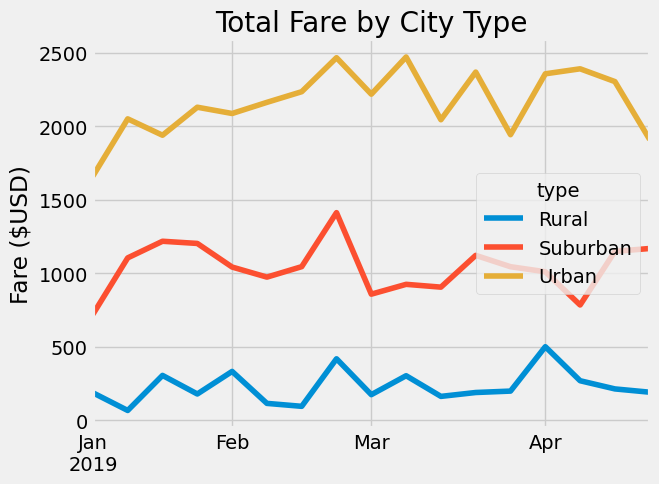

<Figure size 1000x600 with 0 Axes>

In [116]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares = weekly_pyber_2019.plot()
plt.figure(figsize=(10,6))
weekly_fares.set_title('Total Fare by City Type')
weekly_fares.set_ylabel('Fare ($USD)')
weekly_fares.set_xlabel('')
#Save the figure.
plt.savefig("PyBer_fare_summary.png")
#Display graph.
plt.show()